In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [28]:
df = pd.read_csv("D:\Data Science basics\Datasets\mydata-automobile-cleaned.csv")

In [29]:
model = LinearRegression()

In [30]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
dtype: object

In [31]:
x = df[['highway-mpg']]
y = df['price']

In [32]:
model.fit(x, y)

LinearRegression()

In [34]:
p = model.predict(x)
p

array([16166.94140528, 16166.94140528, 16955.96802513, 13799.86154571,
       20112.07450456, 17744.99464499, 17744.99464499, 17744.99464499,
       21690.12774427, 20112.07450456, 14588.88816557, 14588.88816557,
       15377.91478542, 15377.91478542, 17744.99464499, 20112.07450456,
       20112.07450456, 21690.12774427, -4347.75071097,  3542.51548759,
        3542.51548759,  5120.5687273 ,  7487.64858686, 13799.86154571,
        7487.64858686,  7487.64858686,  7487.64858686, 13799.86154571,
       13799.86154571, 18534.02126485, -5136.77733083,  7487.64858686,
        4331.54210744, 10643.75506629, 10643.75506629, 10643.75506629,
       10643.75506629, 11432.78168614, 11432.78168614, 11432.78168614,
       11432.78168614, 15377.91478542, 13010.83492586, 14588.88816557,
        3542.51548759,  3542.51548759, 14588.88816557, 22479.15436412,
       22479.15436412, 24057.20760384, 13010.83492586,  7487.64858686,
        7487.64858686,  7487.64858686,  7487.64858686, 19323.0478847 ,
      

In [35]:
print(model.intercept_)
print(model.coef_)

37470.66014138313
[-789.02661986]


In [36]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [37]:
model.fit(z, df['price'])

LinearRegression()

In [41]:
predict = model.predict(z)
predict

array([1.38574330e+04, 1.38574330e+04, 1.79738625e+04, 1.05726330e+04,
       1.59123803e+04, 1.44199531e+04, 1.57026461e+04, 1.61213292e+04,
       1.69878366e+04, 1.70950954e+04, 1.07391799e+04, 1.07391799e+04,
       1.80281009e+04, 1.82374424e+04, 1.95363657e+04, 2.60543619e+04,
       2.66252935e+04, 2.72311513e+04, 1.21467464e+01, 5.46308717e+03,
       5.59630454e+03, 5.56448654e+03, 5.75960874e+03, 8.66496058e+03,
       6.10597390e+03, 6.18971053e+03, 6.18971053e+03, 8.90475185e+03,
       1.23865890e+04, 1.82993712e+04, 4.11928562e+03, 5.89004634e+03,
       4.09365113e+03, 6.61076075e+03, 6.67166012e+03, 6.87719549e+03,
       6.93048243e+03, 9.80383413e+03, 1.00055633e+04, 1.00626564e+04,
       1.03214788e+04, 1.12728689e+04, 1.04049312e+04, 1.04043530e+04,
       5.46308717e+03, 5.59630454e+03, 1.29420398e+04, 3.42768239e+04,
       3.42768239e+04, 4.24013091e+04, 6.36928758e+03, 5.95206456e+03,
       5.97109561e+03, 6.12334403e+03, 6.14237508e+03, 7.23027416e+03,
      

In [42]:
print(model.intercept_)
print(model.coef_)

-9242.91668008529
[ 18.14725936   3.80621055 101.10676267 -65.040733  ]


(0.0, 48138.21227896024)

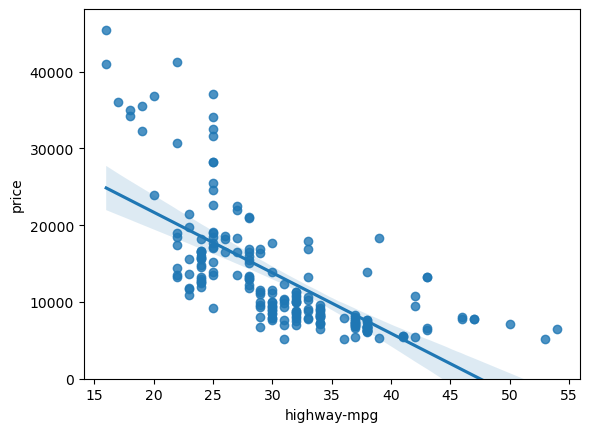

In [50]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df)        #Regression plot     
plt.ylim(0, )

<Axes: xlabel='highway-mpg', ylabel='price'>

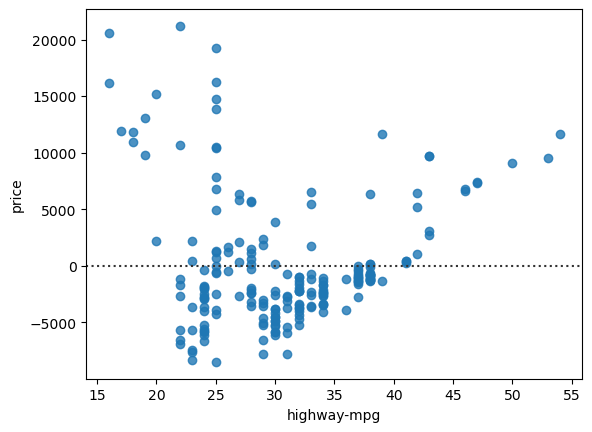

In [51]:
sns.residplot(x = df['highway-mpg'], y = df['price'])         #Residual plot

C:\Users\Harivenkat\anaconda3\envs\python_mov\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harivenkat\anaconda3\envs\python_mov\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Harivenkat\anaconda3\envs\python_mov\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


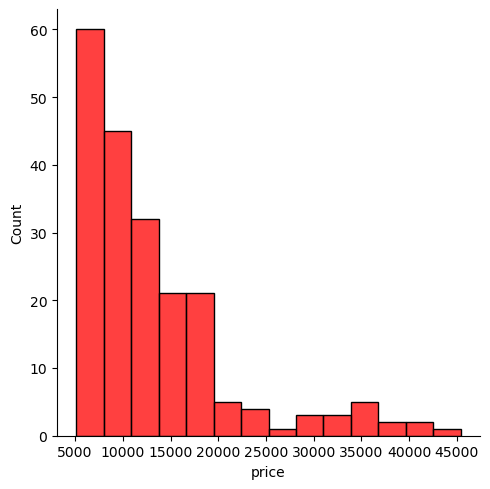

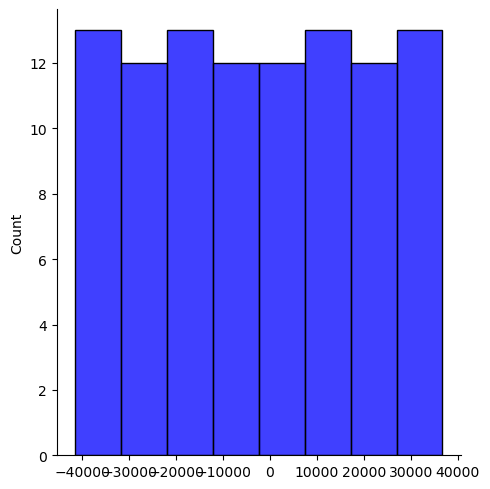

In [82]:
ax1 = sns.displot(df['price'], color = 'r', label = 'Actual Value')
sns.displot(predict, color = 'b', label = 'Fitted Values', ax = ax1)    #Distribution plot(MLR)

In [66]:
#mean_squared_error(df['price'], y_predict_simple_fit)

In [67]:
x = df[['highway-mpg']]
y = df['price']

In [68]:
model.fit(x, y)

LinearRegression()

In [69]:
model.score(x, y)

0.47682578947968446

In [70]:
model.fit(x, y)

LinearRegression()

In [72]:
model.predict(np.array(30.0).reshape(-1, 1))

C:\Users\Harivenkat\anaconda3\envs\python_mov\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13799.86154571])

In [73]:
model.coef_

array([-789.02661986])

In [83]:
new_input = np.arange(1, 101, 50).reshape(-1, 1)
print(new_input)

[[ 1]
 [51]]


In [81]:
predict = model.predict(new_input)
predict

C:\Users\Harivenkat\anaconda3\envs\python_mov\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 36681.63352153,  35892.60690167,  35103.58028182,  34314.55366196,
        33525.5270421 ,  32736.50042225,  31947.47380239,  31158.44718254,
        30369.42056268,  29580.39394283,  28791.36732297,  28002.34070311,
        27213.31408326,  26424.2874634 ,  25635.26084355,  24846.23422369,
        24057.20760384,  23268.18098398,  22479.15436412,  21690.12774427,
        20901.10112441,  20112.07450456,  19323.0478847 ,  18534.02126485,
        17744.99464499,  16955.96802513,  16166.94140528,  15377.91478542,
        14588.88816557,  13799.86154571,  13010.83492586,  12221.808306  ,
        11432.78168614,  10643.75506629,   9854.72844643,   9065.70182658,
         8276.67520672,   7487.64858686,   6698.62196701,   5909.59534715,
         5120.5687273 ,   4331.54210744,   3542.51548759,   2753.48886773,
         1964.46224787,   1175.43562802,    386.40900816,   -402.61761169,
        -1191.64423155,  -1980.6708514 ,  -2769.69747126,  -3558.72409112,
        -4347.75071097,  

In [86]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [89]:
#scores = cross_val_score(lr, x, y, cv = 3)
#np.mean(scores)

In [91]:
#yhat = cross_val_predict(lr2e, x, y, cv = 3)